In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file="un-general-debates.csv"
df=pd.read_csv(file)

# Description of the file

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
dtypes: int64(2), object(2)
memory usage: 234.7+ KB


In [5]:
df.head(10)

,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...
5,44,1989,PHL,"﻿Before you began to occupy that exalted seat,..."
6,44,1989,SDN,﻿It gives me great pleasure to congratulate Am...
7,44,1989,RUS,﻿My task as head of the delegation of the Sovi...
8,44,1989,CHN,﻿\nPermit me to begin by warmly congratulating...
9,44,1989,ESP,﻿I should like to express my sincere congratul...


In [6]:
df.tail()

,session,year,country,text
7502,56,2001,KAZ,﻿This session\nthat is taking place under extr...
7503,56,2001,LBR,﻿I am honoured to\nparticipate in this histori...
7504,56,2001,BDI,﻿It\nis for me a signal honour to take the flo...
7505,56,2001,HUN,"﻿First, may I congratulate Mr. Han Seung-soo o..."
7506,56,2001,KWT,"﻿On behalf of the State of Kuwait, it\ngives m..."


## Summary statistics

In [7]:
df['length']=df['text'].str.len()

In [8]:
df['length'].describe()

count     7507.000000
mean     17967.281604
std       7860.038463
min       2362.000000
25%      12077.000000
50%      16424.000000
75%      22479.500000
max      72041.000000
Name: length, dtype: float64

## Number of countries

In [9]:
df['country'].describe(include='0')

count     7507
unique     199
top        IRN
freq        46
Name: country, dtype: object

## Plot length distribution

<Axes: >

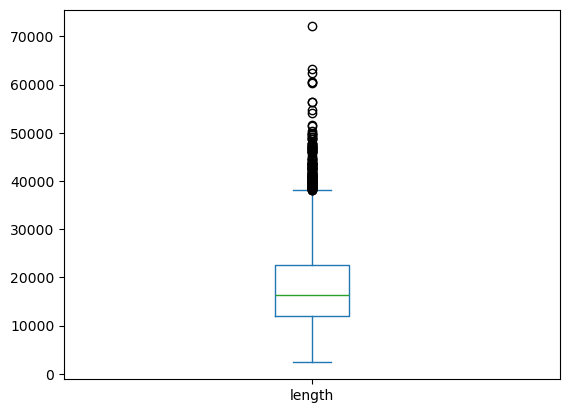

In [10]:
df['length'].plot(kind='box') # option vert=False pour le mettre à l'horizontale

<Axes: title={'center': 'Histogram of variable length'}, ylabel='Frequency'>

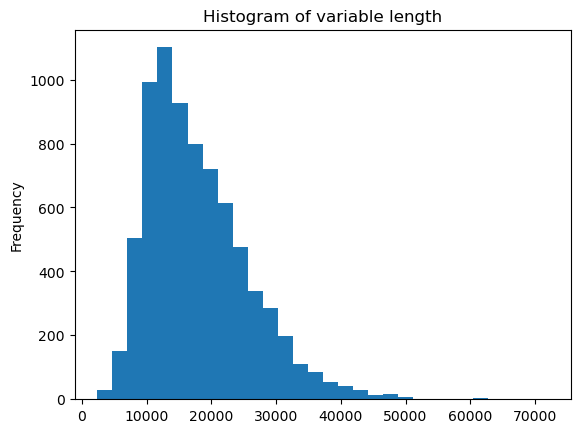

In [11]:
df['length'].plot(kind='hist',bins=30,title='Histogram of variable length') # bins=30 the numerical values are divided into 30 intervals of equal width

# Comparison between countries

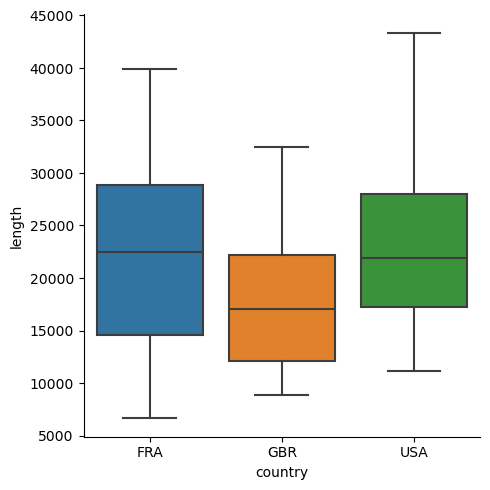

In [12]:
where = df['country'].isin(['USA','FRA','GBR'])
sns.catplot(data=df[where],x="country",y="length",kind="box")

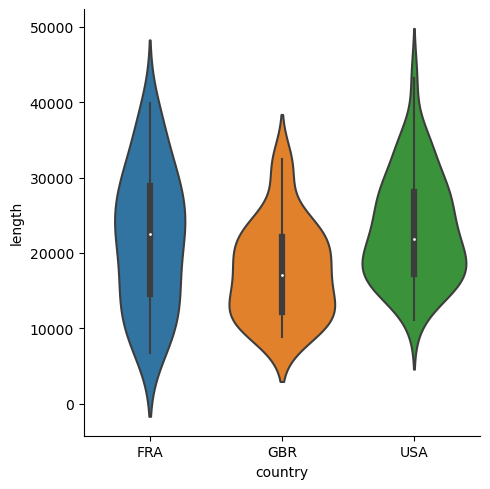

In [13]:
sns.catplot(data=df[where],x="country",y="length",kind="violin")

## development over time

In [14]:
df.groupby('year').size()

year
1970     70
1971    116
1972    125
1973    120
1974    129
1975    126
1976    134
1977    140
1978    141
1979    144
1980    149
1981    145
1982    147
1983    149
1984    150
1985    137
1986    149
1987    152
1988    154
1989    153
1990    156
1991    162
1992    167
1993    175
1994    178
1995    172
1996    181
1997    176
1998    181
1999    181
2000    178
2001    189
2002    188
2003    189
2004    192
2005    185
2006    193
2007    191
2008    192
2009    193
2010    189
2011    194
2012    195
2013    193
2014    194
2015    193
dtype: int64

<Axes: title={'center': 'Number of countries'}, xlabel='year'>

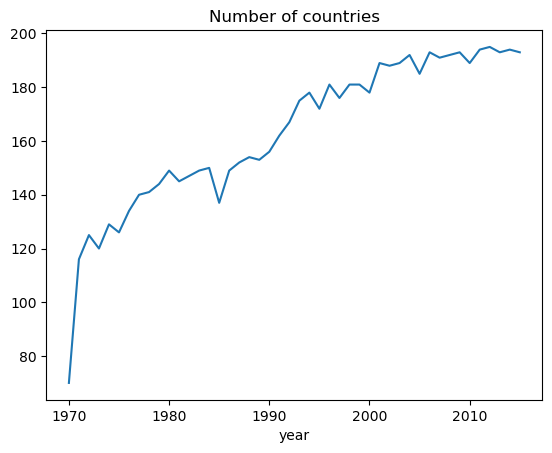

In [15]:
df.groupby('year').size().plot(title="Number of countries")

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

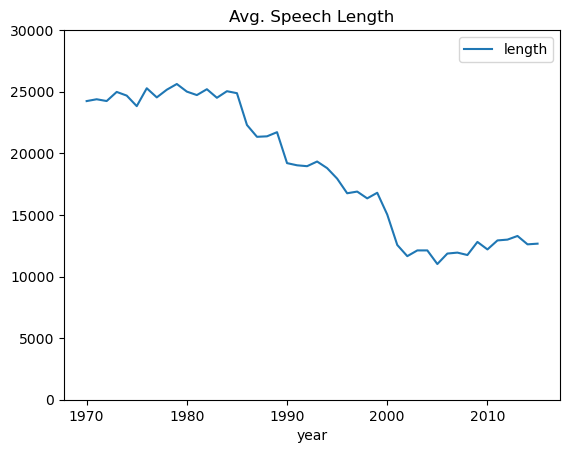

In [16]:
df.groupby('year').agg({"length":"mean"}).plot(title="Avg. Speech Length", ylim=(0,30000))

In [17]:
df['text'][0]

"\ufeffIt is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further consolidate the gains achieved during the past year.\nMy delegation associates itself with previous speakers in expressing its appreciation of the dedicated efforts of his predecessor, His Excellency Mr. Dante Caputo, for the exemplary manner in which he discharged his duties as President of the forty-third session of the General Assembly.\nAs in previous years, my delegation wishes to note its satisfaction with and gratitude for the assiduous and unrelenting efforts exerted by the Secretary-General of the United Nations in the cause of peace and international harmony. We pay a tribute to

## Tokenization

In [18]:
import regex as re

In [19]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*',text)

In [20]:
test="For the meetings before 1994, the transcripts were produced from the original, raw transcripts in the FOMC Secretariat's files"
tokens=tokenize(test)
print("/".join(tokens))

For/the/meetings/before/the/transcripts/were/produced/from/the/original/raw/transcripts/in/the/FOMC/Secretariat/s/files


In [21]:
print(tokens)

['For', 'the', 'meetings', 'before', 'the', 'transcripts', 'were', 'produced', 'from', 'the', 'original', 'raw', 'transcripts', 'in', 'the', 'FOMC', 'Secretariat', 's', 'files']


In [22]:
## Importation of a list of stop words

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ylepen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopwords=set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'hers', 'between', 'more', 'doing', 'm', 'of', 'theirs', 'were', 'he', "mightn't", 'i', 'ain', 'an', 'there', 'after', 'had', 'some', 'did', 'this', 'once', 'just', "it's", 'above', 'can', 'aren', 'at', "didn't", "you're", 'why', 'who', 'with', 'to', 'for', 'be', 'below', 'on', 'that', 'am', 'do', 'she', 'because', 'should', 'you', 'him', 'yourself', 'the', 'what', 'mightn', 'those', 'than', 'whom', 'a', 'and', "aren't", "won't", 'no', "hasn't", "doesn't", "should've", 'will', "wasn't", 'haven', 'me', 'its', 't', 'from', 'has', 'as', "you've", 'both', "you'd", 're', 'needn', 'which', 'when', 'your', 'being', 'but', 'until', 'further', 'mustn', "hadn't", 'very', "haven't", 'so', "don't", 'was', 'my', 'itself', 'any', 'now', 'hasn', 'few', 'through', 'off', "needn't", 'ma', 'their', 'if', 'been', 'them', 'down', "weren't", "wouldn't", 'only', 'by', 'yours', 'into', 'having', 'are', "couldn't", "that'll", 've', 'shan', 'shouldn', 'does', "shouldn't", 'ourselves', 'such', "shan't", 'y', '

In [25]:
len(stopwords)

179

## stopwords from spacy

In [26]:
import spacy 
import en_core_web_sm
en = en_core_web_sm.load()

# Import stopword from spaCy
#import spacy 

# Import stopword from spaCy
#import spacy 
#loading the english language small model of spacy

stopwords_spa = en.Defaults.stop_words

print(len(stopwords_spa))
print(stopwords_spa)

326
{'make', 'more', 'sixty', 'neither', 'go', 'name', 'thereby', 'after', 'rather', 'hereafter', 'nowhere', 'n’t', 'this', "'ll", 'just', '‘s', 'below', 'on', 'across', 'perhaps', 'than', 'whom', 'used', 'via', 'no', 'using', 'next', 'everywhere', 'top', 'else', 'many', 'from', 'also', 're', 'beyond', 'but', 'further', 'within', 'hence', 'very', 'was', 'mine', 'my', 'nobody', 'unless', '‘d', 'six', 'through', 'behind', 'even', 'only', "'d", 'side', 'whatever', 'into', 'hereby', 'various', 'own', 'where', 'onto', 'none', 'except', 'still', 'two', 'nine', 'see', '’re', 'move', 'against', 'her', 'other', 'then', 'hundred', 'between', 'hers', 'of', 'front', "n't", 'he', 'due', 'three', 'ten', 'had', 'beside', 'say', '‘ve', 'above', 'amount', 'can', 'together', 'regarding', 'formerly', 'whether', 'beforehand', 'that', 'becoming', 'am', 'she', 'per', 'whereupon', 'full', 'you', 'what', 'those', 'whose', 'whereafter', 'a', 'former', 'one', 'eleven', 'me', 'has', 'upon', 'much', 'already', 'f

In [27]:
include_stopwords={'dear','regards','must','would','also'}
exclude_stopwords={'whatever'}

In [28]:
stopwords_spa |= include_stopwords
stopwords_spa -= exclude_stopwords

In [29]:
stopwords_spa

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'dear',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from

In [30]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [31]:
remove_stop(tokens)

['meetings',
 'transcripts',
 'produced',
 'original',
 'raw',
 'transcripts',
 'FOMC',
 'Secretariat',
 'files']

# Definition of the pipeline

In [32]:
pipeline = [str.lower,tokenize,remove_stop]

In [33]:
def prepare(text,pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [34]:
df['tokens']=df['text'].apply(prepare,pipeline=pipeline)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
 4   length   7507 non-null   int64 
 5   tokens   7507 non-null   object
dtypes: int64(3), object(3)
memory usage: 352.0+ KB


In [36]:
df['tokens'][0]

['indeed',
 'pleasure',
 'members',
 'delegation',
 'extend',
 'ambassador',
 'garba',
 'sincere',
 'congratulations',
 'election',
 'presidency',
 'forty-fourth',
 'session',
 'general',
 'assembly',
 'election',
 'high',
 'office',
 'well-deserved',
 'tribute',
 'personal',
 'qualities',
 'experience',
 'fully',
 'confident',
 'able',
 'wise',
 'leadership',
 'assembly',
 'consolidate',
 'gains',
 'achieved',
 'past',
 'year',
 'delegation',
 'associates',
 'previous',
 'speakers',
 'expressing',
 'appreciation',
 'dedicated',
 'efforts',
 'predecessor',
 'excellency',
 'mr',
 'dante',
 'caputo',
 'exemplary',
 'manner',
 'discharged',
 'duties',
 'president',
 'forty-third',
 'session',
 'general',
 'assembly',
 'previous',
 'years',
 'delegation',
 'wishes',
 'note',
 'satisfaction',
 'gratitude',
 'assiduous',
 'unrelenting',
 'efforts',
 'exerted',
 'secretary-general',
 'united',
 'nations',
 'cause',
 'peace',
 'international',
 'harmony',
 'pay',
 'tribute',
 'untiring',
 'eff

In [38]:
from collections import Counter
counter = Counter(df['tokens'][0])
print(counter)

Counter({'security': 16, 'international': 14, 'efforts': 13, 'situation': 13, 'states': 13, 'peace': 11, 'development': 11, 'environment': 11, 'welcome': 10, 'political': 10, 'global': 10, 'continues': 9, 'nuclear': 9, 'economic': 9, 'countries': 9, 'small': 9, 'nations': 8, 'conflict': 8, 'maldives': 8, 'united': 7, 'support': 7, 'delegation': 6, 'taken': 6, 'continue': 6, 'weapons': 6, 'conference': 6, 'people': 6, 'issue': 6, 'years': 5, 'organization': 5, 'recent': 5, 'particularly': 5, 'important': 5, 'regional': 5, 'hope': 5, 'therefore': 5, 'world': 5, 'well': 5, 'community': 5, 'system': 5, 'national': 5, 'parties': 5, 'assistance': 5, 'sovereignty': 5, 'members': 4, 'assembly': 4, 'year': 4, 'note': 4, 'peaceful': 4, 'today': 4, 'towards': 4, 'many': 4, 'present': 4, 'regard': 4, 'independence': 4, 'reconciliation': 4, 'survival': 4, 'trade': 4, 'opportunity': 4, 'zones': 4, 'palestine': 4, 'lebanon': 4, 'integrity': 4, 'upon': 4, 'peoples': 4, 'level': 4, 'state': 4, 'indeed'

# We can add new sets of tokens

In [39]:
counter.update(df['tokens'][1])
print(counter)

Counter({'united': 31, 'nations': 31, 'international': 29, 'development': 25, 'states': 24, 'security': 23, 'global': 20, 'countries': 20, 'environment': 18, 'assembly': 17, 'efforts': 17, 'year': 16, 'peace': 15, 'situation': 14, 'world': 14, 'general': 13, 'organization': 13, 'welcome': 13, 'economic': 13, 'political': 12, 'continues': 12, 'conference': 12, 'problems': 11, 'also': 11, 'national': 11, 'finland': 11, 'nuclear': 10, 'developing': 10, 'peace-keeping': 10, 'particularly': 9, 'time': 9, 'present': 9, 'process': 9, 'therefore': 9, 'weapons': 9, 'conflict': 9, 'support': 9, 'level': 9, 'small': 9, 'new': 9, 'session': 8, 'important': 8, 'taken': 8, 'hope': 8, 'namibia': 8, 'continue': 8, 'co-operation': 8, 'maldives': 8, 'people': 8, 'community': 8, 'order': 8, 'already': 8, 'possible': 8, 'secretary-general': 7, 'recent': 7, 'confidence': 7, 'role': 7, 'number': 7, 'many': 7, 'human': 7, 'well': 7, 'part': 7, 'could': 7, 'parties': 7, 'ozone': 7, 'layer': 7, 'protection': 7

In [40]:
counter = Counter()
df['tokens'].map(counter.update)
len(counter)

68398

In [41]:
counter

Counter({'nations': 124508,
         'united': 120763,
         'international': 117223,
         'world': 89421,
         'countries': 85734,
         'peace': 72625,
         'development': 62632,
         'states': 59713,
         'people': 59338,
         'security': 58425,
         'economic': 53833,
         'must': 51880,
         'also': 47403,
         'new': 44453,
         'country': 40878,
         'assembly': 40413,
         'community': 38294,
         'government': 37430,
         'general': 37138,
         'organization': 36434,
         'human': 36384,
         'would': 35936,
         'efforts': 35184,
         'us': 34618,
         'rights': 33495,
         'political': 33353,
         'one': 31840,
         'africa': 31293,
         'support': 30224,
         'council': 29573,
         'session': 29391,
         'developing': 25977,
         'peoples': 25161,
         'time': 24870,
         'order': 23581,
         'republic': 23369,
         'national': 23221,
   

In [42]:
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


In [44]:
def count_words(df,column='tokens',preprocess=None,min_freq=2):
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter,orient='index',columns=['freq'])
    freq_df=freq_df.query('freq>=@min_freq')
    freq_df.index.name='token'
    
    return freq_df.sort_values('freq',ascending=False)
    

In [46]:
freq_df=count_words(df)

In [48]:
freq_df.head()

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [ ]:
## Frequency Diagram

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

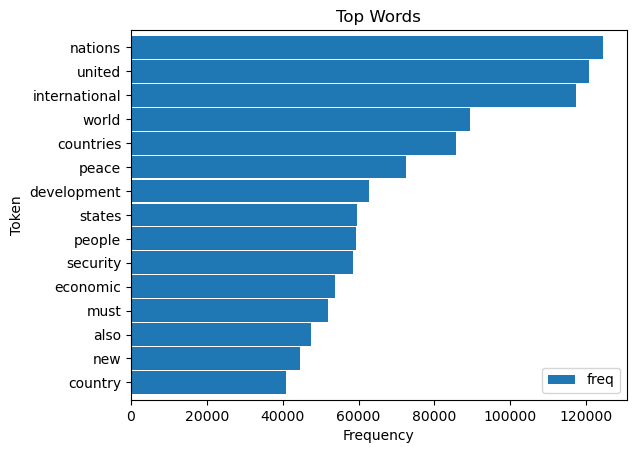

In [49]:
ax=freq_df.head(15).plot(kind='barh',width=0.95)
ax.invert_yaxis()
ax.set(xlabel='Frequency',ylabel='Token',title='Top Words')

## Create WordCloud

In [50]:
from wordcloud import WordCloud

## For a single text

In [53]:
text = df.query("year==2000 and country=='USA'")['text'].values[0]
print(text)

I am
honoured to address the Assembly on behalf of the
United States and to reinforce the eloquent message
President C1inton conveyed during last week's
Millennium Summit. Because my father worked here
when I was young, I have always considered myself a
child of the United Nations. And because I had the
privilege to serve here as America's Permanent
Representative, I feel at home and so will speak
plainly.
The members of this body reflect virtually every
culture, ethnicity and geographical region. We are city
and country, inland and island, tropical and temperate,
developing and industrialized. We are as diverse as
humanity.
And yet, in responding to the daunting demands
of this new era, we are bound together by the interests
we share and the ideals to which we aspire.
We all have a stake in building peace and
relieving poverty, championing development and
curbing disease. We all want to see the dangers posed
by weapons of mass destruction reduced, refugees
cared for, children nourishe

(-0.5, 399.5, 199.5, -0.5)

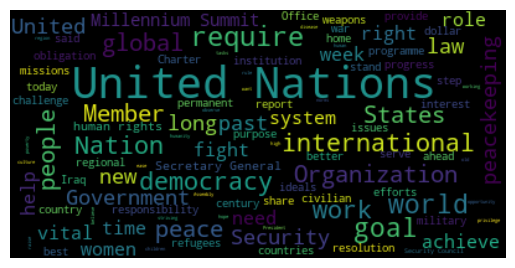

In [54]:
wc = WordCloud(max_words=100,stopwords=stopwords_spa)
wc.generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")